In [50]:
url='https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'

from bs4 import BeautifulSoup
from selenium import webdriver
import time
driver=webdriver.Chrome('c:\webdriver\chromedriver.exe')
driver.get(url)

C:\Users\djagk\AppData\Local\Temp\ipykernel_17412\1814361680.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('c:\webdriver\chromedriver.exe')


In [15]:
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')
channels=soup.select('table>tbody>tr.aos-init')
len(channels)

100

In [ ]:
cha_data=[]
for channel in channels:
    category=channel.select('.category')[0].text.strip()
    title=channel.select('td>h1>a')[0].text.strip()
    subscriber=channel.select('.subscriber_cnt')[0].text
    view=channel.select('.view_cnt')[0].text
    video=channel.select('.video_cnt')[0].text
    cha_data.append([category,title,subscriber,view,video])
    
cha_data
    

In [43]:
import pandas as pd
col=['category','title','subscriber','view','video']
pd_df=pd.DataFrame(cha_data,columns=col)

pd_df.to_excel('data/youtube.xlsx',index=False)

In [51]:

##유투브 여러페이지에서 크롤링
result=[]
for page in range(1,11):
    
    url=f"https://www.youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='{page}'"
    driver.get(url)
    time.sleep(2)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    channels=soup.select('form>table>tbody>tr')
    for channel in channels:
        category=channel.select('.category')[0].text.strip()
        title=channel.select('td>h1>a')[0].text.strip()
        subscriber=channel.select('.subscriber_cnt')[0].text
        view=channel.select('.view_cnt')[0].text
        video=channel.select('.video_cnt')[0].text
        result.append([category,title,subscriber,view,video])


In [53]:
len(result)

1000

In [54]:
df=pd.DataFrame(result)
df.columns=['category','title','subscriber','view','video']
df.to_excel('data/youtube_all.xlsx',index=False)


,category,title,subscriber,view,video
0,[음악/댄스/가수],BLACKPINK,7420만,236억7615만,394개
1,[음악/댄스/가수],BANGTANTV,6630만,161억5062만,"1,694개"
2,[음악/댄스/가수],HYBE LABELS,6550만,226억3812만,866개
3,[음악/댄스/가수],SMTOWN,3030만,244억9471만,"3,904개"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...
995,[음악/댄스/가수],Raon,428만,10억1890만,313개
996,[미분류],MayTree,426만,8억0379만,175개
997,[키즈/어린이],로미유 스토리[Romiyu Story],420만,11억1561만,434개
998,[음식/요리/레시피],[Dorothy]도로시,417만,10억1440만,919개


In [23]:
## youtube 랭크 정보 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
# 각각의 플랫폼에 따른 설정 위해서
import platform     #플랫폼 관련 라이브러리
if platform.system()=='Windows':
    path='c:\Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)



In [5]:
import pandas as pd
## 엑셀로 저장된 파일 불러오기
df=pd.read_excel('data/youtube_all.xlsx')


In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    1000 non-null   object
 1   title       1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [7]:
df['subscriber'][0:10]
df['subscriber'].str.replace('만','0000')[0:10]
df['replace_subscriber']=df['subscriber'].str.replace('만','0000')
df

,category,title,subscriber,view,video,replace_subscriber
0,[음악/댄스/가수],BLACKPINK,7420만,236억7615만,394개,74200000
1,[음악/댄스/가수],BANGTANTV,6630만,161억5062만,"1,694개",66300000
2,[음악/댄스/가수],HYBE LABELS,6550만,226억3812만,866개,65500000
3,[음악/댄스/가수],SMTOWN,3030만,244억9471만,"3,904개",30300000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000
...,...,...,...,...,...,...
995,[음악/댄스/가수],Raon,428만,10억1890만,313개,4280000
996,[미분류],MayTree,426만,8억0379만,175개,4260000
997,[키즈/어린이],로미유 스토리[Romiyu Story],420만,11억1561만,434개,4200000
998,[음식/요리/레시피],[Dorothy]도로시,417만,10억1440만,919개,4170000


In [8]:
df['replace_subscriber']=df['replace_subscriber'].astype('int') #int로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            1000 non-null   object
 1   title               1000 non-null   object
 2   subscriber          1000 non-null   object
 3   view                1000 non-null   object
 4   video               1000 non-null   object
 5   replace_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [30]:
## 카테고리별 구독자 수 채널 수 피봇 테이블 생성
pivot_df=df.pivot_table(index='category',values='replace_subscriber',aggfunc=['sum','count'])
pivot_df.head()

,sum,count
,replace_subscriber,replace_subscriber
category,,
[BJ/인물/연예인],100700000.0,20
[TV/방송],864800000.0,120
[게임],42900000.0,10
[뉴스/정치/사회],209800000.0,30
[미분류],324400000.0,40


In [31]:
## pivot 데이터 프레임 컬럼명 변경하기
pivot_df.columns=['subscriber_sum','category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],100700000.0,20
[TV/방송],864800000.0,120
[게임],42900000.0,10
[뉴스/정치/사회],209800000.0,30
[미분류],324400000.0,40


In [32]:
# 데이터프레임의 인덱스 초기화
pivot_df=pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],100700000.0,20
1,[TV/방송],864800000.0,120
2,[게임],42900000.0,10
3,[뉴스/정치/사회],209800000.0,30
4,[미분류],324400000.0,40


In [33]:
##데이터프레임 내림차순정렬
pivot_df=pivot_df.sort_values(by='subscriber_sum',ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
7,[음악/댄스/가수],5.580300e+09,370
9,[키즈/어린이],1.673300e+09,220
6,[음식/요리/레시피],9.971000e+08,140
1,[TV/방송],8.648000e+08,120
4,[미분류],3.244000e+08,40


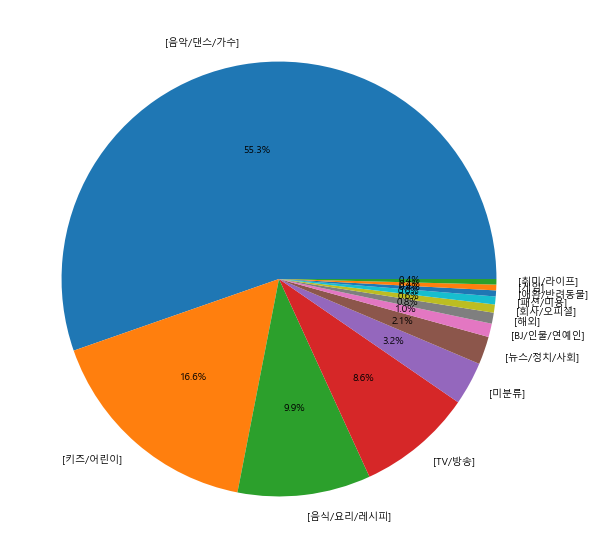

In [34]:
#카테고리별 구독자수 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
plt.figure(figsize=(30,10))
plt.pie(pivot_df['subscriber_sum'],labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

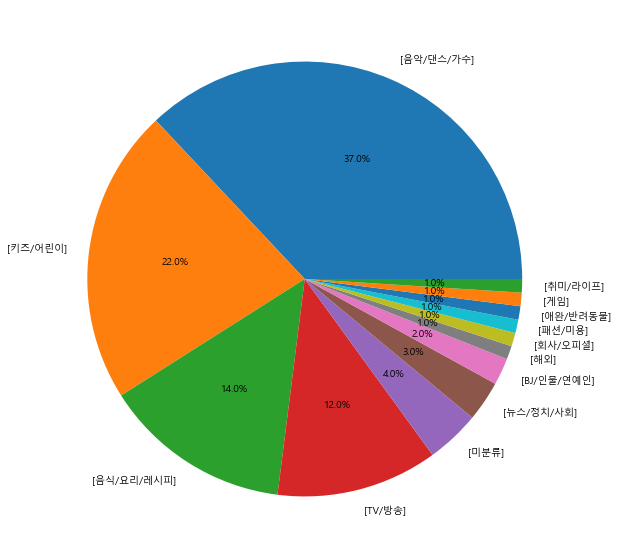

In [36]:
pivot_df=pivot_df.sort_values(by='category_count',ascending=False)
pivot_df.head()
plt.figure(figsize=(30,10))
plt.pie(pivot_df['category_count'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()

In [ ]:
## fig 또는 figure는 전체 그래프의 크기
## Axes : 그래프가 그려지는 Figure의 하위섹션 Title,X-Laebel, Y-Label
# Axis: Axes의 하위 요소로 그래프의 척도를 나타내는 숫자 선.
#       2차원 그래프는 x와 Y Axis, 3차원은 X,YZ Axis를 가짐
# Label: figure의 다양한 요소의 이름
# Legend : Axes안에 여러개의 그림이 있는 경우에 입력 값에 따라서 각각의 Label이 존재함
# Title : 각 Axes에 주어진 이름. figure가 각각의 Title로 여러개의 Axes를 가짐
##     Figure또한 각각의 Title을 가짐
# Ticklabels :각 Axis(X,Y 또는 Z)는 여러개의 동일한 'Bin'으로 나눈 값의 범위
#       'Bin'은 두가지 레벨에서 선택
# Spines : Figure의 가장자리를 의미함. 각각의 "Axes"에는 네개의 Spines 가 존재함

# Grid : 그래프의 다양한 점의 좌표를 쉽게 읽도록 영역을 Grid로 나눌 수 있음


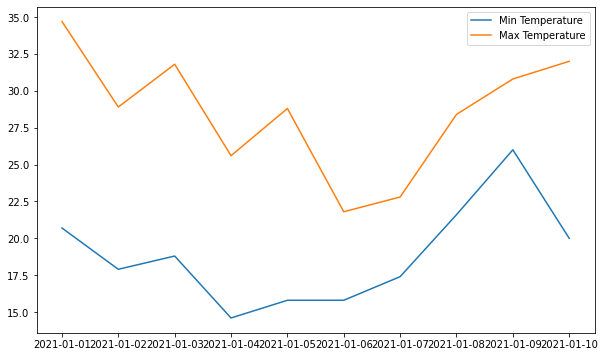

In [2]:
import matplotlib.pyplot as plt

dates=[
    '2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05',
    '2021-01-06','2021-01-07','2021-01-08','2021-01-09','2021-01-10'
]
min_temperature=[20.7,17.9,18.8,14.6,15.8,15.8,17.4,21.6,26.0,20.0]
max_temperature=[34.7,28.9,31.8,25.6,28.8,21.8,22.8,28.4,30.8,32.0]

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
axes.plot(dates,min_temperature,label='Min Temperature')
axes.plot(dates,max_temperature,label='Max Temperature')
axes.legend()
plt.show()